### Lasso

In [4]:
#lasso -> ridge와 비슷한 맥락이나 차이점은 많은 W * x 중 w를 0으로 만들어 feature를 지운다. -> 모델에 영향을 가하는 feature 지우기
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

x,y = mglearn.datasets.load_extended_boston()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

lasso = Lasso().fit(x_train,y_train)
print("train set score : {:.2f}".format(lasso.score(x_train,y_train)))
print("test set score : {:2f}".format(lasso.score(x_test,y_test)))
print("use feature number : {}".format(np.sum(lasso.coef_!=0)))


train set score : 0.29
test set score : 0.209375
use feature number : 4


In [5]:
#t성능이 좋지 않은 lasso를 좋게 하기 위해선 alpha 값과 max_iter(반복 실행하는 최대 횟수)를 증가시킨다
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

x,y = mglearn.datasets.load_extended_boston()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

lasso = Lasso(alpha=0.01, max_iter=100000).fit(x_train,y_train)
print("train set score : {:.2f}".format(lasso.score(x_train,y_train)))
print("test set score : {:2f}".format(lasso.score(x_test,y_test)))
print("use feature number : {}".format(np.sum(lasso.coef_!=0)))

train set score : 0.90
test set score : 0.765649
use feature number : 33


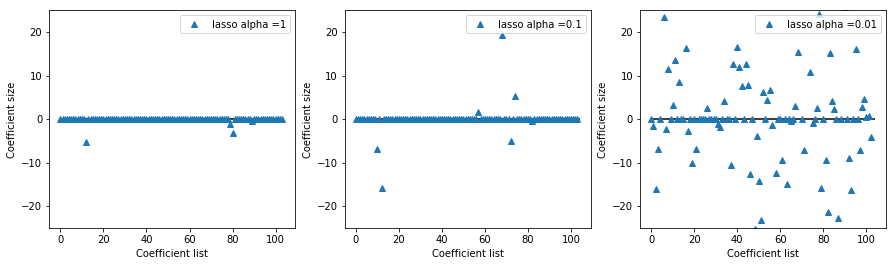

In [24]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

x,y = mglearn.datasets.load_extended_boston()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

lasso = Lasso().fit(x_train,y_train)
lasso0001 = Lasso(alpha = 0.001, max_iter =1000000).fit(x_train, y_train)
lasso001 = Lasso(alpha=0.1, max_iter=100000).fit(x_train,y_train)

fig, axes = plt.subplots(1,3,figsize=(15,4)) #subplots(열로 배열할 그림수, 행으로 배열 할 그림수, figsize = 그림크기 (x,y))
j = 1

list = [lasso,lasso001,lasso0001]
for i,ax in zip(list,axes):
    ax.plot(i.coef_,"^", label = "lasso alpha ="+str(j))
    j /=10
    ax.set_xlabel("Coefficient list")#계수 목록
    ax.set_ylabel("Coefficient size")#계수 크기
    ax.hlines(0,0,len(i.coef_))
    ax.set_ylim(-25,25)

    ax.legend()


#### * 보통 릿지 회귀가 선호 되나 특성이 많고 그중 중요한 특성이 한정적일 때는 라쏘